**Intalling EasyOCR package**

In [ ]:
!pip install easyocr

**Installing Tesseract-OCR and Pytesseract**

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


**Import necessary libraies**

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import pytesseract

**Reading and displaying original image using openCV python library**

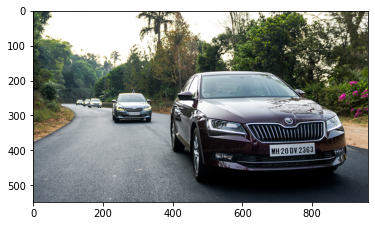

In [ ]:
original_image = cv2.imread('car_image.jpg') # Reading image using cv2.read()
original_image_color = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) # Specify color for image
plt.imshow(original_image_color)

##**Image Pre-Processing**## 

**Convert color image to grayscale**

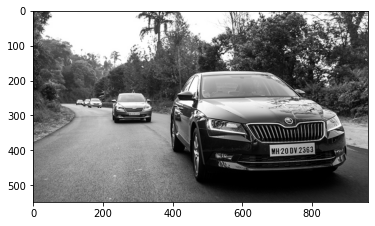

In [ ]:
grayscale_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(grayscale_img, cv2.COLOR_BGR2RGB))

**Applying Bilateral filter and Canny edge detector**

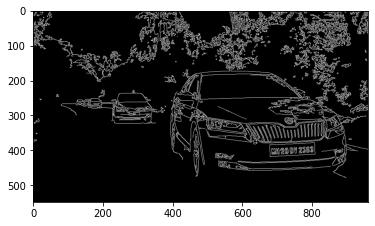

In [ ]:
b_filter = cv2.bilateralFilter(grayscale_img, 11, 17, 17) # Reduce noise
edged_img = cv2.Canny(b_filter, 30, 450) # Canny edge detector for edge detection
plt.imshow(cv2.cvtColor(edged_img, cv2.COLOR_BGR2RGB))

##**Licence Plate Detection steps**

**Finding Contours for detecting shapes**

In [ ]:
# gathering all the points that are similar and connected to eachother 
keypoints = cv2.findContours(edged_img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

**Locate the number plate using approxPolyDP() method**

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True) #approximate polygon with contour and value
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

**Applying mask on image to detect the number plate**

In [ ]:
mask = np.zeros(grayscale_img.shape, np.uint8)
# locating and masking the number plate 
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(original_image, original_image, mask=mask)

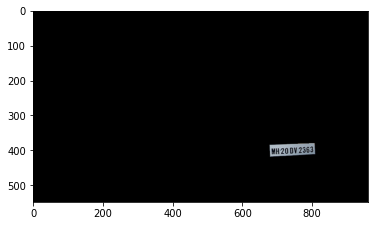

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

**Display location of license plate in original image**

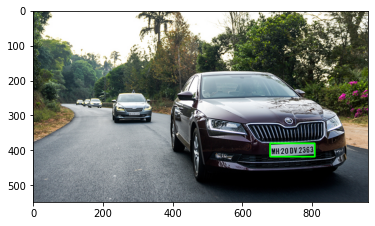

In [ ]:
res = cv2.rectangle(original_image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) 
# approx is used for identifying number plate 
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

##**License plate Character recognition steps**

**Crop the image of license plate from original image**

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = grayscale_img[x1:x2+1, y1:y2+1]

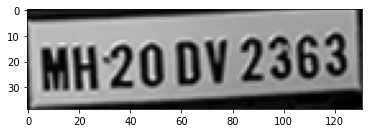

In [ ]:
 plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

**Character recognition using EasyOCR python package**

In [ ]:
reader = easyocr.Reader(['en']) # en indicates english language
result = reader.readtext(cropped_image) # reading english characters from cropped number plate image
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435011630275409)]

##**Character Recognition using Pytesseract**

**Seperating the license plate from image**

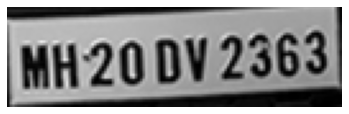

In [ ]:
# display license plate image
detected_plate_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.axis('off') 
plt.imshow(detected_plate_image, cmap = 'gray');

**Converting license plate image into grayscale for characterisation**

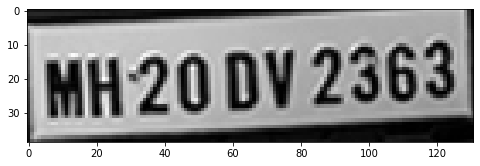

In [ ]:
grayscale_img = cv2.cvtColor(detected_plate_image, cv2.COLOR_BGRA2GRAY)
plt.figure(figsize=(8,8)) # increase size on image 8x8
plt.imshow(grayscale_img,cmap="gray")
plt.show()

**Smoothing and removing noise from image using medianBlur**

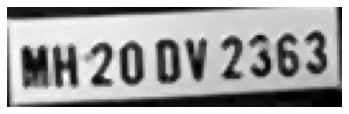

In [ ]:
# Blurring is performed to recognize the accurate characters of license plate
blurred_img = cv2.medianBlur(grayscale_img,3) # specified kernel size 3
plt.axis('off') 
plt.imshow(blurred_img, cmap = 'gray');

**License plate Character recognition using Pytesseract**

In [ ]:
# Image is converted to string and contents of license plate are displayed
print(pytesseract.image_to_string(blurred_img, 
                                  config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRTUVWXYZ0123456789'))

MH20 DV 2363



**Thank you**